In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
# !pip install tensorflow
# import pickle
# import tensorflow as tf
#  UpSampling2D, BatchNormalization
sys.path.insert(0,'../..')
from gp2 import Runner

In [3]:
!locate gp2


/lib/modules/5.4.0-104-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-104-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/lib/modules/5.4.0-105-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-105-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/lib/modules/5.4.0-42-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-42-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/lib/modules/5.4.0-64-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-64-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/raid/alphafold_data3/pdb_mmcif/mmcif_files/1gp2.cif
/raid/alphafold_data3/pdb_mmcif/mmcif_files/3gp2.cif
/raid/alphafold_data3/pdb_mmcif/mmcif_files/4gp2.cif
/raid/alphafold_data3/pdb_mmcif/mmcif_files/6gp2.cif
/usr/src/linux-headers-5.4.0-104/include/linux/input/gp2ap002a00f.h
/usr/src/linux-headers-5.4.0-104-generic/include/config/gp2ap020a00f.h
/usr/src/linux-headers-5.4.0-104-generic/include/config/input/gp2a.h
/usr

In [4]:

R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmpk32t5vruGP2
Verbose mode active!


In [5]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_images_final.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/Lung_Opacity/Lung_masks_final.npy')

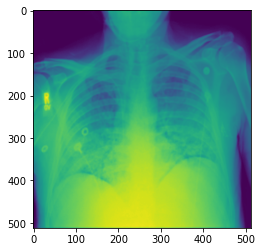

In [6]:
plt.imshow(images[500])

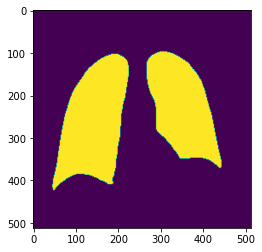

In [7]:
plt.imshow(masks[500])

In [8]:
len(images)

6012

In [9]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [10]:
#
#
R.setup_data(images, masks, dataset_size=6012, weights=weights)

Weights OK!


In [11]:
RUNS = 5

In [12]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Epoch 1/100
5/5 [==============================] - 32s 4s/step - loss: 1.3725 - dice_coeff: 0.3754 - val_loss: 1.3840 - val_dice_coeff: 0.3047
Epoch 2/100
5/5 [==============================] - 7s 2s/step - loss: 1.0645 - dice_coeff: 0.4699 - val_loss: 1.3758 - val_dice_coeff: 0.3038
Epoch 3/100
5/5 [==============================] - 7s 1s/step - loss: 0.9498 - dice_coeff: 0.5136 - val_loss: 1.3706 - val_dice_coeff: 0.3028
Epoch 4/100
5/5 [==============================] - 7s 2s/step - loss: 0.8457 - dice_coeff: 0.5553 - val_loss: 1.3656 - val_dice_coeff: 0.3018
Epoch 5/100
5/5 [==============================] - 7s 1s/step - loss: 0.7842 - dice_coeff: 0.5804 - val_loss: 1.3610 - val_dice_coeff: 0.3009
Epoch 6/100
5/5 [==============================] - 7s 2s/step - loss: 0.7695 - dice_coeff: 0.5845 - val_loss: 1.3573 - val_dice_coeff: 0.2997
Epoch 7/100
5/5 [==============================] - 7s 2s/step - loss: 0.7464 - dice_coeff: 0.5971 - val_loss: 1.3522 - val_dice_coeff: 0

Replacing 57 from 172 !
D_relabeled_ 57
selected_ids ['5a9982c9-fa5d-4603-b252-7524cfa3a93d', '5f9d9d82-5609-4a65-8125-48ef1cd69479', 'bdc5227a-4077-46e0-ad91-56dc5a15af69', '29b5a341-a2f1-4b62-b582-adf718196803', 'c8e765d9-9ec0-49a2-82ee-4aa13be59109', 'c31cdf47-0cfd-4af5-a7b7-cca7452cb05b', '495218f5-6f9d-4569-baa0-8ae778dbeca0', '8fca6265-7b17-48fd-be80-f75ebd18b435', 'd0052b24-811c-49eb-94fb-a52dd56def0a', 'e98d9b13-b768-455d-a746-1d7379734eef', 'a8c77d31-e12b-4328-b15a-be513b690198', '67d9644a-1201-4edc-9f59-9076058ee88b', '35c98176-2eed-4bbe-b756-f2163f8e491a', '73588467-1403-405e-b80b-989d52bfc360', '63617fb4-45aa-4936-a703-879b425b498a', '437c9798-2e3b-4588-a80a-b62616771bad', '4f0d67e9-a400-47f1-b6d3-af4b240bd5e4', '80fc0b96-1a92-43ee-b531-7bc2c1dbd952', '6e444497-7482-44b1-97a4-2d3e35d0f19c', 'd68cdd72-b190-4400-9338-cbf9ee210aa1', '061e9937-7167-4ae5-9c44-0101d4f23a72', 'cc6eaff4-cee0-4afb-9a64-26732dd938c4', 'ad362212-864a-42ad-8462-b3d850cd3016', 'a146583c-cfc4-4b22-ac5d-3

Replacing 61 from 185 !
D_relabeled_ 61
selected_ids ['bf2de4af-8545-45d8-abcc-08c84c850023', 'a2eb1de5-59f4-4752-bd64-2791dad5ed93', '0a18a1d8-38ac-48e6-841c-fb9f2d2466c2', '03fca4d7-283b-4b59-b688-230cc2e693e7', 'bda5ef1b-f39d-466e-b5b0-6fe04b94ad04', '3fa31733-f92a-4199-886a-97e854ad5c12', '820a8a75-c983-4921-93d1-8d18926a26cb', 'aade1d74-ea5f-47f0-a8b4-85d087ac4bea', 'e25c5095-60f5-443e-9cda-ac5152a34b4b', '55e2917a-9b98-4102-a3be-a2d3dd6416d5', '89d6a8eb-7453-4428-a582-a12f06353dde', 'fa472a83-2848-4739-97a8-d6b76ffa93d9', '85e5574d-796d-44a7-b591-63d74a574527', 'e68db2c6-827c-4088-9022-34acd3c35257', 'cc250a21-b30f-42b1-ac26-4b3f4bb0ba32', '9ab28d06-7b04-41a2-942a-f605ebaa4917', 'c3067040-320f-4afb-8ec6-c4506d8be0d6', 'bdb6160f-ba06-4628-aa32-17c6adabc760', '208d2c12-27c3-4400-8df6-777e64f067c1', '696b945f-44cf-4f5f-a224-7a15f7603530', 'ec652752-36f9-40d2-a2e3-1382c09b69f8', 'c50d4372-4b68-4c97-8990-7ea4d42ab1cc', 'a16ed931-fce1-4404-900f-262e639ef0b9', 'df3d5950-9503-476e-9446-d

Lost Datapoint!! 44433cc6-87ae-468d-bf80-ccd758175d27
Lost Datapoint!! 5b64af0a-3ebb-46d1-83b9-23571600e32f
Lost Datapoint!! ec652752-36f9-40d2-a2e3-1382c09b69f8
Lost Datapoint!! 695b20c3-de47-45a3-bc07-a5cb2db001e4
Lost Datapoint!! 8064a230-66ee-49ec-ad3d-434fb16821c3
Lost Datapoint!! 4d3ce8a4-020b-4832-9919-bf114cfd6b5b
D_relabeled_ 61
selected_ids ['ad0d1f83-1e0e-45b2-8b9b-94023877393e', '3d0048c7-b876-4575-a0dd-82a94ca9355c', '4021f5b7-67b4-4804-b838-f2910f083ce5', 'fbd44725-b447-43f3-b07f-111e92479ad7', '251ada46-95fa-4b26-bcfd-7274c8b76f07', 'bf2de4af-8545-45d8-abcc-08c84c850023', '70166b1e-0083-410f-be48-d180a32fcd81', '89d6a8eb-7453-4428-a582-a12f06353dde', '8bd81543-1b0f-4dc3-b24a-6462ba6903f2', 'de35d10a-f5ee-40f4-a154-d4b29553f2a3', '47c3930c-a8ed-481f-8f8d-0481e7b28146', '29d4311e-57f9-4eba-8ebf-c01f5683221e', '695663f5-0250-49d7-ac43-0c82983a2438', '58a072d1-9943-4b31-9391-0921cc37a840', '5bd18ed2-602e-40de-b135-a489ef9edb5d', '7bdf9df5-30c7-4e21-81b7-356012f973df', '123fd

Epoch 14/100
8/8 [==============================] - 10s 1s/step - loss: 0.4014 - dice_coeff: 0.7562 - val_loss: 0.7032 - val_dice_coeff: 0.6030
Epoch 15/100
8/8 [==============================] - 9s 1s/step - loss: 0.4038 - dice_coeff: 0.7584 - val_loss: 0.6380 - val_dice_coeff: 0.6461
Epoch 16/100
8/8 [==============================] - 10s 1s/step - loss: 0.3975 - dice_coeff: 0.7620 - val_loss: 0.6388 - val_dice_coeff: 0.6459
Epoch 17/100
8/8 [==============================] - 9s 1s/step - loss: 0.3962 - dice_coeff: 0.7595 - val_loss: 0.6270 - val_dice_coeff: 0.6440
Epoch 18/100
8/8 [==============================] - 10s 1s/step - loss: 0.3932 - dice_coeff: 0.7674 - val_loss: 0.6514 - val_dice_coeff: 0.6391
Epoch 19/100
8/8 [==============================] - 9s 1s/step - loss: 0.3947 - dice_coeff: 0.7674 - val_loss: 0.6053 - val_dice_coeff: 0.6607
Epoch 20/100
8/8 [==============================] - 10s 1s/step - loss: 0.3877 - dice_coeff: 0.7683 - val_loss: 0.5981 - val_dice_coeff: 0.

Lost Datapoint!! 3fe30ff3-9ed7-46d8-a324-c4562a292a70
Lost Datapoint!! 2b1e6eaf-0dec-48c9-a4a7-01b041861bd0
Lost Datapoint!! ad0d1f83-1e0e-45b2-8b9b-94023877393e
Lost Datapoint!! cb7ea567-df5a-4a5b-b993-a9fc94a9172c
Lost Datapoint!! 24b59005-311a-4498-8890-596f449ce3a8
Lost Datapoint!! a54dc62d-b9bb-4e26-9d9e-2c2446c8920e
D_relabeled_ 61
selected_ids ['1ff245f4-2bd2-48ac-bc83-bdace9a3e9f3', '52318705-bd19-4ee7-98a6-8781977a087d', '9ab28d06-7b04-41a2-942a-f605ebaa4917', 'cc250a21-b30f-42b1-ac26-4b3f4bb0ba32', 'bda5ef1b-f39d-466e-b5b0-6fe04b94ad04', '7d96bcd0-3bbd-4c25-8f6e-3eaba7828255', '70166b1e-0083-410f-be48-d180a32fcd81', '5b64af0a-3ebb-46d1-83b9-23571600e32f', 'f7d82cd3-efd2-4b7c-b9d1-6394cccec807', '108e4a34-a8f8-408b-87ae-73540071b1bb', '240e682b-bc51-4e59-acbb-5a30f336b766', 'dffaa10e-afbf-42e6-a4ae-67917f272a4c', '24b4be7c-4ca6-45e4-92b5-71a5725c34e9', '729f5be7-f6ad-4432-9ef3-7f0163a0ab96', '60dd5e94-4efe-45d2-8ae1-2cd12f13e561', '8064a230-66ee-49ec-ad3d-434fb16821c3', '2efa9

Epoch 8/100
8/8 [==============================] - 9s 1s/step - loss: 0.2774 - dice_coeff: 0.8262 - val_loss: 0.3790 - val_dice_coeff: 0.7880
Epoch 9/100
8/8 [==============================] - 10s 1s/step - loss: 0.2782 - dice_coeff: 0.8264 - val_loss: 0.3764 - val_dice_coeff: 0.7886
Epoch 10/100
8/8 [==============================] - 10s 1s/step - loss: 0.2766 - dice_coeff: 0.8276 - val_loss: 0.3823 - val_dice_coeff: 0.7893
Epoch 11/100
8/8 [==============================] - 10s 1s/step - loss: 0.2733 - dice_coeff: 0.8289 - val_loss: 0.3718 - val_dice_coeff: 0.7908
Epoch 12/100
8/8 [==============================] - 10s 1s/step - loss: 0.2733 - dice_coeff: 0.8294 - val_loss: 0.3621 - val_dice_coeff: 0.7941
Epoch 13/100
8/8 [==============================] - 10s 1s/step - loss: 0.2709 - dice_coeff: 0.8308 - val_loss: 0.3585 - val_dice_coeff: 0.7933
Epoch 14/100
8/8 [==============================] - 10s 1s/step - loss: 0.2677 - dice_coeff: 0.8319 - val_loss: 0.3569 - val_dice_coeff: 0.

Epoch 65/100
8/8 [==============================] - 10s 1s/step - loss: 0.1851 - dice_coeff: 0.8805 - val_loss: 0.2910 - val_dice_coeff: 0.8353
Epoch 66/100
8/8 [==============================] - 10s 1s/step - loss: 0.1834 - dice_coeff: 0.8823 - val_loss: 0.2926 - val_dice_coeff: 0.8379
Epoch 67/100
8/8 [==============================] - 10s 1s/step - loss: 0.1820 - dice_coeff: 0.8830 - val_loss: 0.2897 - val_dice_coeff: 0.8383
Epoch 68/100
8/8 [==============================] - 10s 1s/step - loss: 0.1795 - dice_coeff: 0.8839 - val_loss: 0.2924 - val_dice_coeff: 0.8355
Epoch 69/100
8/8 [==============================] - 9s 1s/step - loss: 0.1791 - dice_coeff: 0.8844 - val_loss: 0.2891 - val_dice_coeff: 0.8404
Epoch 70/100
8/8 [==============================] - 10s 1s/step - loss: 0.1783 - dice_coeff: 0.8857 - val_loss: 0.2819 - val_dice_coeff: 0.8421
Epoch 71/100
8/8 [==============================] - 10s 1s/step - loss: 0.1743 - dice_coeff: 0.8871 - val_loss: 0.2833 - val_dice_coeff: 

In [13]:
R.classifier_scores

[[1.2874842882156372, 0.2701348066329956],
 [1.28477144241333, 0.25614869594573975],
 [0.9462538361549377, 0.4571562111377716],
 [0.44740721583366394, 0.7679243087768555],
 [0.38234588503837585, 0.8217824101448059]]

In [14]:
R.discriminator_scores

[[0.0, 1.0],
 [0.0, 1.0],
 [36.41866683959961, 0.5111111402511597],
 [59.30927276611328, 0.4861111044883728],
 [53.5146484375, 0.5222222208976746]]

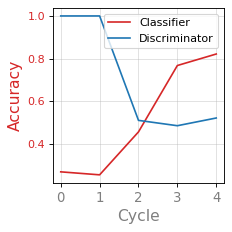

In [15]:
R.plot()